In [17]:
import sys
sys.path.insert(0, '../src')
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from data_loader import load_data

In [18]:
""" SPX ticker symbol is ^GSPC on Yahoo Finance """
from_date = datetime.datetime(1960, 1, 1) 
to_date = datetime.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)
csv_url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=' + from_date.strftime('%s') + '&period2=' + to_date.strftime('%s') + '&interval=1d&events=history&includeAdjustedClose=true'
local_file = '../data/spx_HistoricalData.csv'
max_age_days = 7

df = load_data(csv_url, local_file, max_age_days)

In [19]:
""" Data Transformation """
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1960-01-04,59.910000,59.910000,59.910000,59.910000,59.910000,3990000
1960-01-05,60.389999,60.389999,60.389999,60.389999,60.389999,3710000
1960-01-06,60.130001,60.130001,60.130001,60.130001,60.130001,3730000
1960-01-07,59.689999,59.689999,59.689999,59.689999,59.689999,3310000
1960-01-08,59.500000,59.500000,59.500000,59.500000,59.500000,3290000


In [20]:
""" Chart Variables"""
start_year = 1960

# Set 'last_index' to the last date with a valid value (so I can display 'as of <date>' in chart title)
last_index = df['Adj Close'].last_valid_index()

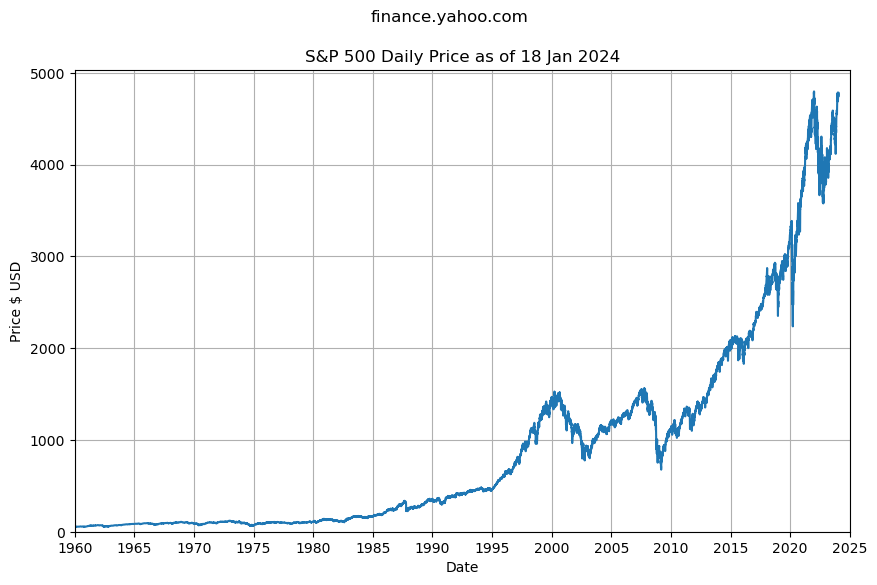

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price $ USD')
plt.suptitle('finance.yahoo.com')
plt.title('S&P 500 Daily Price as of ' + last_index.strftime('%d %b %Y'))
left_limit = pd.to_datetime(f'{start_year}-01-01')
if start_year >= 2000:
    tick_years = 1
else:
    tick_years = 5
plt.ylim(bottom=0) #, top=top_limit)     
plt.xlim(left=left_limit, right=pd.to_datetime('2025-01-01'))
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.YearLocator(tick_years))  # Set major ticks every x years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years

plt.grid(True)

plt.savefig(os.path.join('..', 'pages', 'images', 'spx-history.png'), bbox_inches='tight')
plt.show()